# Data Science Career Change Likelihood

* Student name: Vi Bui
* Student pace: Part-Time
* Scheduled project review date/time: 12/xx/21
* Instructor name: Claude Fried
* Blog post URL: https://datasciish.com/

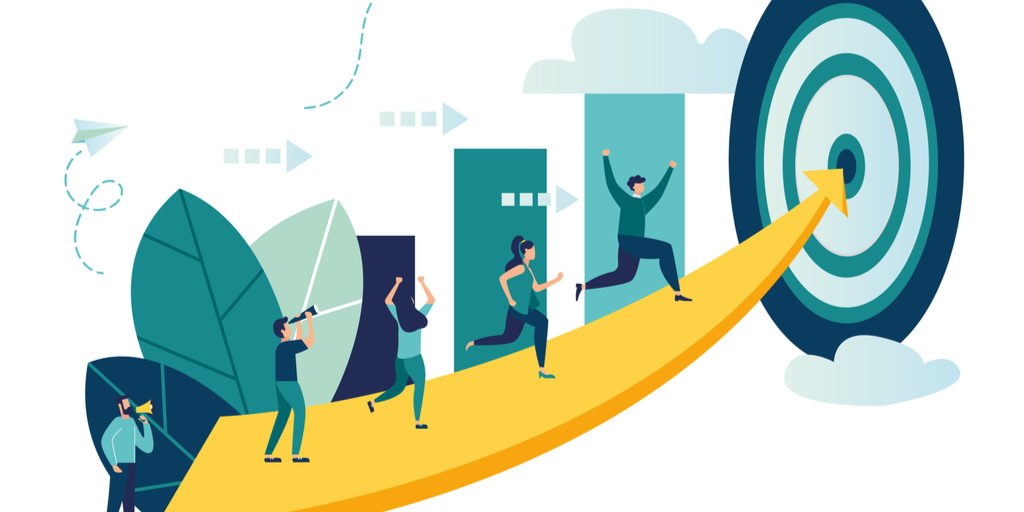

Data Science Career Change Likelihood

## Overview

**Client:** RADS - Recruiting Awesome Data Scientists Incorporation. Data Scientist recruiting firm looking for potential future Data Scientists

**Data, Methodology, and Analysis:** <br/> HR Analytics https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists <br/>

Data context: the data source is from a company that is active in Big Data and Data Science and ran a training program with the intention to hire data scientists among people who successfully passed some courses they conducted. 

This dataset includes current credentials, demographics, experience, education, which will help us build model for RADs about candidates that are likely to be looking for a job change. 




**Models Built:** 

1. Baseline Logical Regression Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. Gradient Booster Classifier 

# Data Exploration, Cleansing, Visualization, and Preparation

**Data Exploration** <br>
Explore HR Analytics data

**Data Cleansing** <br>
Check for duplicates (none); drop NaN values and unnecessary columns; continuously clean data as necessary 

**Data Visualization** <br>
Use visualizations to explore the data and determine how to further refine the dataset in order to prepare for modeling 

**Data Preparation** <br>

## Data Exploration and Cleansing
Import data and all packages needed for data exploration and modeling 

In [1]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

import os 
import warnings

Explore: columns, shape, info 

In [2]:
# Import data

df = pd.read_csv('aug_train.csv',index_col=0)

In [3]:
# Look at DataFrame

df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0


In [4]:
# Explore columns and values 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


## Feature Descriptions 

**Features**

enrollee_id: Unique ID for candidate

city: City code

city_development_index: Development index of the city (scaled)

gender: Gender of candidate

relevant_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline: Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: data science course training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [5]:
# Check for duplicates
# (keep='first').sum()

df.duplicated().sum()

49

In [6]:
# Drop duplicates
# (subset=None, keep='first', inplace=False)

df = df.drop_duplicates()

In [7]:
# Check there are no duplicates remaining

df.duplicated().sum()

0

In [8]:
# Check sum of Missing (NaN) values 

df.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2809
experience                  65
company_size              5920
company_type              6122
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [9]:
# Create formula to observe percentages of the values missing 

df_missing = df.isna().sum()
df_missing/len(df)

city                      0.000000
city_development_index    0.000000
gender                    0.235910
relevent_experience       0.000000
enrolled_university       0.020200
education_level           0.024072
major_discipline          0.146999
experience                0.003402
company_size              0.309802
company_type              0.320373
last_new_job              0.022136
training_hours            0.000000
target                    0.000000
dtype: float64

In [10]:
# Check data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19109 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19109 non-null  object 
 1   city_development_index  19109 non-null  float64
 2   gender                  14601 non-null  object 
 3   relevent_experience     19109 non-null  object 
 4   enrolled_university     18723 non-null  object 
 5   education_level         18649 non-null  object 
 6   major_discipline        16300 non-null  object 
 7   experience              19044 non-null  object 
 8   company_size            13189 non-null  object 
 9   company_type            12987 non-null  object 
 10  last_new_job            18686 non-null  object 
 11  training_hours          19109 non-null  int64  
 12  target                  19109 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


In [11]:
# would df.descibe() or df.correlation() at this point cause data leakage?

In [12]:
# Explore the value counts of each feature

for col in df.columns:
    print(df[col].value_counts())

city_103    4318
city_21     2697
city_16     1530
city_114    1336
city_160     842
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
0.920    5160
0.624    2697
0.910    1530
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64
Male      13173
Female     1237
Other       191
Name: gender, dtype: int64
Has relevent experience    13749
No relevent experience      5360
Name: relevent_experience, dtype: int64
no_enrollment       13772
Full time course     3753
Part time course     1198
Name: enrolled_university, dtype: int64
Graduate          11556
Masters            4358
High School        2013
Phd                 414
Primary School      308
Name: education_level, dtype: int64
STEM               14447
Humanities           669
Other                381
Business Degree      327
Arts       

## Data Visualization 

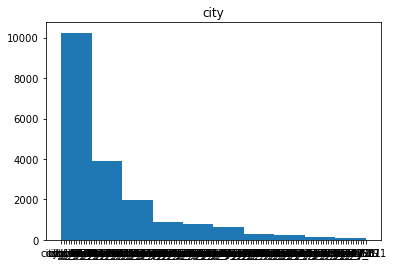

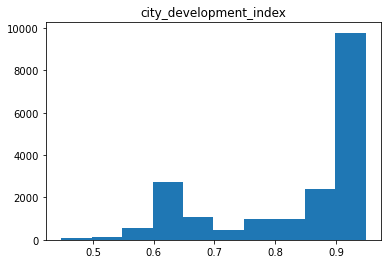

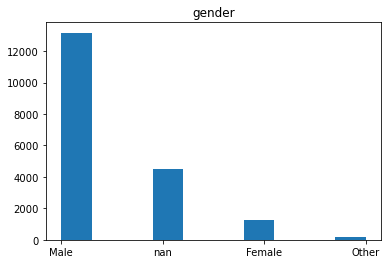

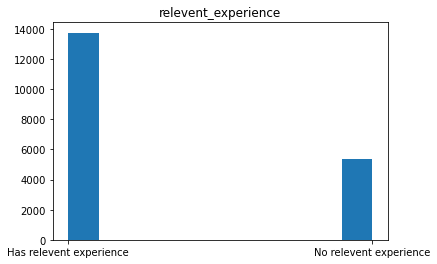

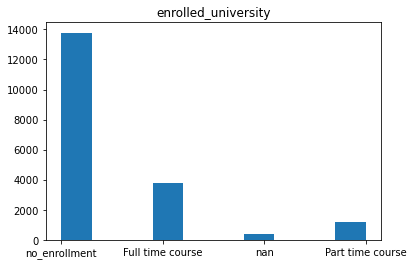

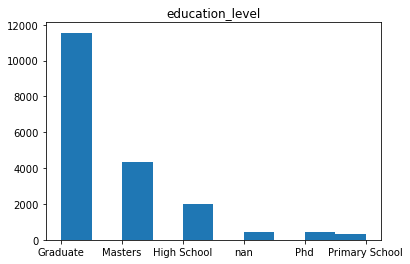

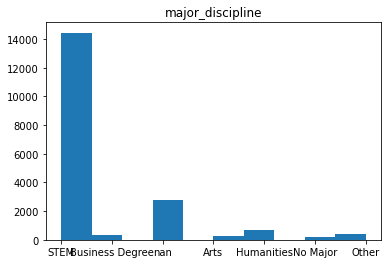

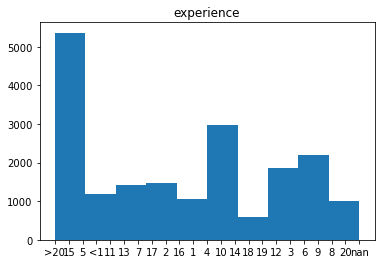

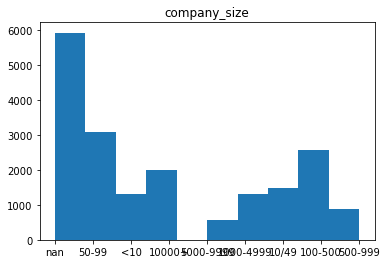

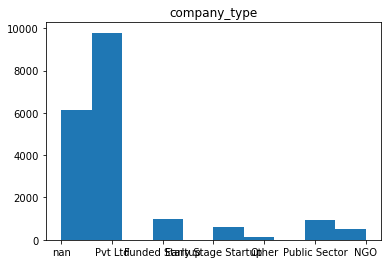

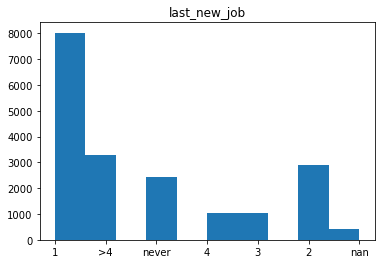

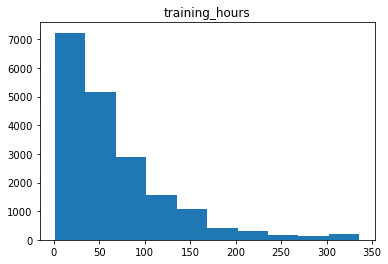

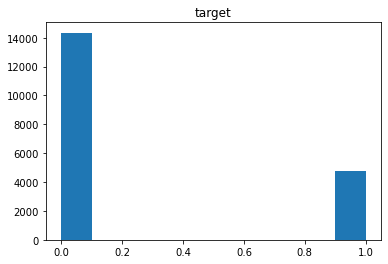

In [13]:
# Visualize the data 

for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [14]:
# Follow-up: scatterplot

# for col in df.columns:
#    plt.figure(figsize=(12,8))
#    sns.scatterplot((df[col].value_counts()))
#    plt.title(col)
#    plt.show();

## Check for Class Imbalance

In [15]:
# Check for class imbalance 

y = df['target']
X = df.drop(columns=['target'])
y.value_counts(normalize=True)

0.0    0.750641
1.0    0.249359
Name: target, dtype: float64

**The data is imbalanced**

## Train Test Split the Data

In [16]:
# Create Train and Test data subsets using train_test_split
# Check shape of each data set 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=100, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14331, 12), (4778, 12), (14331,), (4778,))

In [17]:
14331+4778

19109

## Impute, Fit, and Transform the Data

**We believe the missing values in the dataset will be useful to our modeling** <br/> 
Impute NaN values to "Missing" 

In [18]:
# Impute NaN values to "Missing"
# Fit the data

imputer = SimpleImputer(strategy='constant', fill_value='Missing')
imputer.fit(X_train)

# Transform the data 

X_train_processed = pd.DataFrame(
    imputer.transform(X_train),columns=X_train.columns)

X_test_processed = pd.DataFrame(
    imputer.transform(X_test), columns=X_test.columns)

In [19]:
# Look the the transformed data and datatypes

X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14331 entries, 0 to 14330
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city                    14331 non-null  object
 1   city_development_index  14331 non-null  object
 2   gender                  14331 non-null  object
 3   relevent_experience     14331 non-null  object
 4   enrolled_university     14331 non-null  object
 5   education_level         14331 non-null  object
 6   major_discipline        14331 non-null  object
 7   experience              14331 non-null  object
 8   company_size            14331 non-null  object
 9   company_type            14331 non-null  object
 10  last_new_job            14331 non-null  object
 11  training_hours          14331 non-null  object
dtypes: object(12)
memory usage: 1.3+ MB


In [20]:
X_train_processed

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_162,0.767,Male,No relevent experience,Full time course,High School,Missing,3,Missing,Missing,never,49
1,city_103,0.92,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,never,6
2,city_7,0.647,Male,No relevent experience,no_enrollment,Graduate,No Major,2,Missing,Missing,1,18
3,city_24,0.698,Missing,No relevent experience,no_enrollment,Masters,STEM,>20,Missing,Missing,2,45
4,city_105,0.794,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,Public Sector,3,52
...,...,...,...,...,...,...,...,...,...,...,...,...
14326,city_46,0.762,Missing,No relevent experience,Full time course,Missing,Missing,8,<10,Early Stage Startup,1,53
14327,city_103,0.92,Male,Has relevent experience,Full time course,High School,Missing,6,Missing,NGO,2,36
14328,city_74,0.579,Male,Has relevent experience,no_enrollment,Masters,STEM,8,100-500,Pvt Ltd,3,50
14329,city_74,0.579,Male,No relevent experience,no_enrollment,Masters,STEM,2,100-500,Pvt Ltd,2,32


In [21]:
# Explore the Train data using .describe()

X_train_processed.describe()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
count,14331,14331.00,14331,14331,14331,14331,14331,14331,14331,14331,14331,14331
unique,123,93.00,4,2,4,6,7,23,9,7,7,241
top,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Missing,Pvt Ltd,1,28
freq,3260,3899.00,9879,10339,10348,8682,10889,2444,4423,7357,6016,232


In [22]:
# Explore the Test data using .describe()

X_test_processed.describe()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
count,4778,4778.00,4778,4778,4778,4778,4778,4778,4778,4778,4778,4778
unique,116,88.00,4,2,4,6,7,23,9,7,7,237
top,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Missing,Pvt Ltd,1,28
freq,1058,1261.00,3294,3410,3424,2874,3558,809,1497,2431,2011,95


In [23]:
# Create variable for "Number" columns (integers, floats)
# Create variable for "Category" columns (objects, strings)
# Check Category Columns

# NUMBER_COLUMNS = X_train_processed.select_dtypes('number').columns

CATEGORY_COLUMNS = X_train_processed.select_dtypes('object').columns
CATEGORY_COLUMNS

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [24]:
# ONE HOT ENCODE 

ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
X_train_ohe = ohe.fit_transform(X_train_processed[CATEGORY_COLUMNS])
X_test_ohe = ohe.transform(X_test_processed[CATEGORY_COLUMNS])

# CHECK
X_train = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(CATEGORY_COLUMNS))
X_test = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(CATEGORY_COLUMNS))

#X_train_ohe.columns = [c.lower() for c in X_train_ohe]
#X_test_ohe.columns = [c.lower() for c in X_test_ohe]

In [25]:
X_train

,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,...,training_hours_316,training_hours_320,training_hours_322,training_hours_324,training_hours_326,training_hours_328,training_hours_330,training_hours_332,training_hours_334,training_hours_336
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# CLASSIFICATION MODELS

## Baseline Logistic Regression Model

In [26]:
logreg = LogisticRegression(solver='liblinear')
log_reg_model = logreg.fit(X_train, y_train)
log_reg_model

LogisticRegression(solver='liblinear')

In [27]:
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

In [28]:
# Training data performance

residuals = np.abs(y_train - y_pred_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    11324
1.0     3007
Name: target, dtype: int64
0.0    0.790175
1.0    0.209825
Name: target, dtype: float64


**Classifier was about 79% correct on the training data**

In [29]:
# Test data performance

residuals = np.abs(y_test - y_pred_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    3745
1.0    1033
Name: target, dtype: int64
0.0    0.783801
1.0    0.216199
Name: target, dtype: float64


**Classifier was about 78% correct on the test data**

### Confusion Matrix

**Understanding the Confusion Matrix** 

Every item in a Binary Classification dataset has a ground-truth value of 1 or 0. The Confusion Matrix helps us understand: 

True Positives (TP): The number of observations where the model predicted the instance to be true (1), and it is actually true (1). In our case, where our model predicts a candidate is looking for a new job, and they are actually looking for a new job. 

True Negatives (TN): The number of observations where the model predicted the instance to be not true (0), and the instance is actually not true (0). In our case, where our model predicts a candidate is not looking for a new job, and they are actually not looking for a new job. 

False Positives (FP): The number of observations where the model predicted the instance to be true (1), but the instance is actually not true (0). In our case, where our model predicts a candidate is looking for a new job, and they are actually not looking for a new job. 

False Negatives (FN): The number of observations where the model predicted the instance to be not true (0), but the instance is actually true (1). In our case, where our model predicts a candidate is not looking for a new job, and they are actually looking for a new job. 

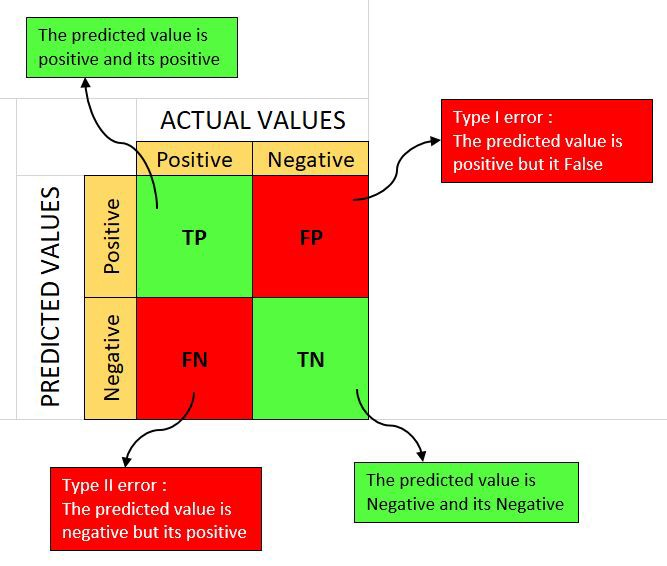

In [30]:
# Create a Confusion Matrix 

from sklearn.metrics import confusion_matrix

#print(confusion_matrix(y_train, y_pred_train))
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[3303  284]
 [ 749  442]]


<AxesSubplot:>

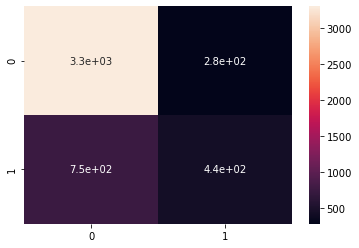

In [31]:
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:>

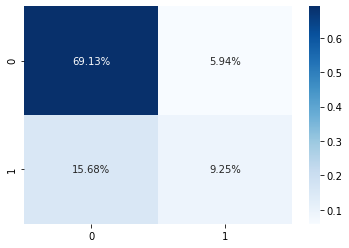

In [32]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### Classification Report

In [33]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87     10757
         1.0       0.62      0.40      0.49      3574

    accuracy                           0.79     14331
   macro avg       0.72      0.66      0.68     14331
weighted avg       0.77      0.79      0.77     14331

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.86      3587
         1.0       0.61      0.37      0.46      1191

    accuracy                           0.78      4778
   macro avg       0.71      0.65      0.66      4778
weighted avg       0.76      0.78      0.76      4778



In [34]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [35]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7939938208621159


AUC: 0.7939938208621159


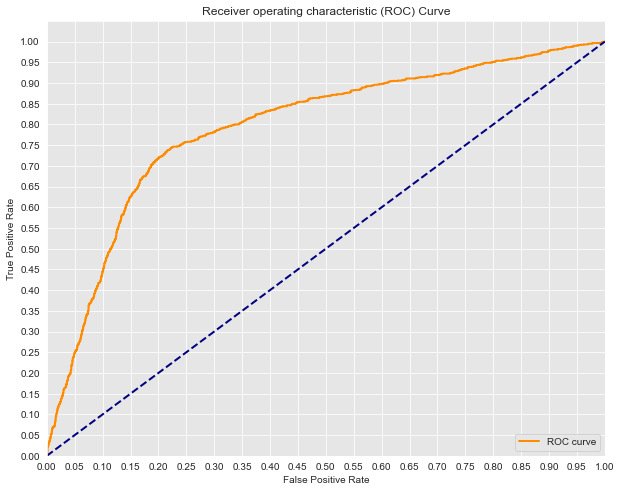

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree Classifier

In [37]:
from sklearn import tree

# random state

decision_tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=100)
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

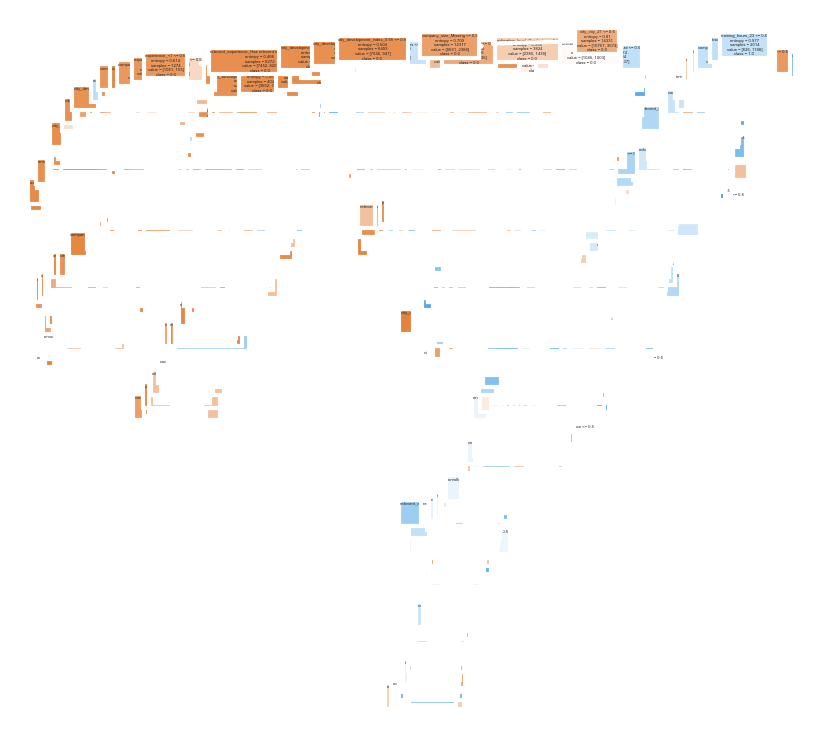

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(decision_tree_clf,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [39]:
# tree.plot_tree(decision_tree_clf)

In [40]:
# Hyperparameter Tuning and Pruning

In [41]:
y_predict = decision_tree_clf.predict(X_test)

In [42]:
# print('Accuracy: ', accuracy_score(y_test, y_predict))

Accuracy:  0.7383842611971536


In [43]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      3587
         1.0       0.47      0.46      0.47      1191

    accuracy                           0.74      4778
   macro avg       0.65      0.65      0.65      4778
weighted avg       0.74      0.74      0.74      4778



In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[2976  611]
 [ 639  552]]


<AxesSubplot:>

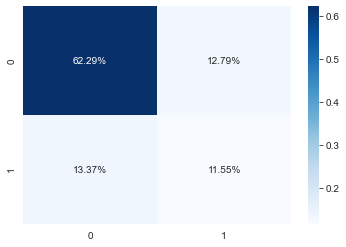

In [46]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

## Random Forest Classifier 

In [48]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

random_forest_clf = RandomForestClassifier(random_state=100)
random_forest_clf.fit(X_train, y_train)
y_predict = random_forest_clf.predict(X_test)

In [50]:
# print('Accuracy: ', accuracy_score(y_test, y_predict))

Accuracy:  0.785475094181666


In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      3587
         1.0       0.59      0.46      0.52      1191

    accuracy                           0.79      4778
   macro avg       0.71      0.68      0.69      4778
weighted avg       0.77      0.79      0.78      4778



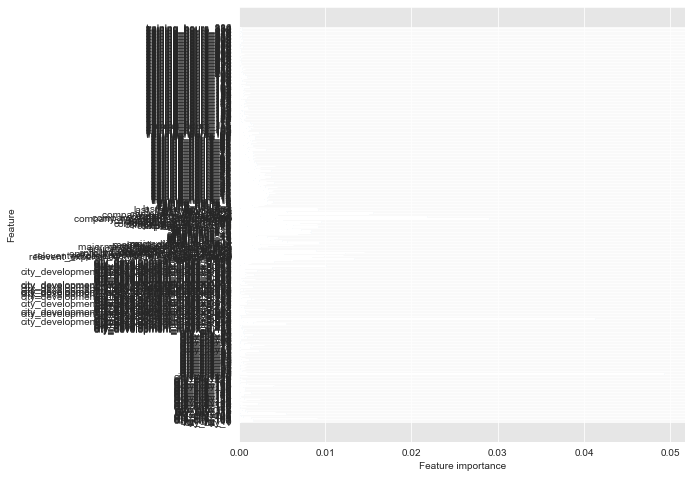

In [52]:
def plot_feature_importances(random_forest_clf):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), random_forest_clf.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(random_forest_clf)

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[3206  381]
 [ 644  547]]


<AxesSubplot:>

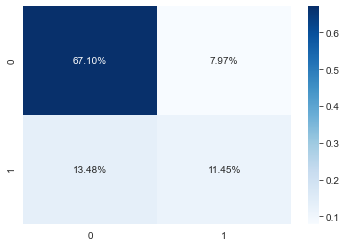

In [54]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### Create a Pipeline with Grid Search integrated 

In [55]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('mms', MinMaxScaler()),
                 ('tree', DecisionTreeClassifier(random_state=100))])

In [56]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('mms', MinMaxScaler()),
                ('tree', DecisionTreeClassifier(random_state=100))])

In [57]:
pipe.score(X_test, y_test)

0.7360820426956886

In [63]:
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('tree', DecisionTreeClassifier(random_state=100))])

grid = [{'tree__max_depth': [None, 2, 6, 10], 
         'tree__min_samples_split': [5, 10]}]


gridsearch = GridSearchCV(estimator=pipe, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

gridsearch.fit(X_train, y_train)

gridsearch.score(X_test, y_test)

0.7867308497279196

In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[3194  393]
 [ 617  574]]


<AxesSubplot:>

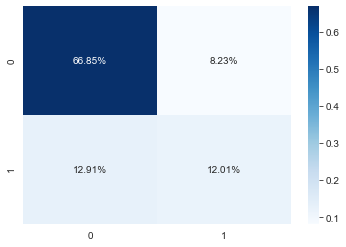

In [65]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

## Gradient Boost

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost_clf = GradientBoostingClassifier(random_state=100)
gradient_boost_clf.fit(X_train, y_train)
gradient_boost_clf.score(X_test, y_test)

0.7886144830473001

In [67]:
y_predict = gradient_boost_clf.predict(X_test)

In [68]:
# print('Accuracy: ', accuracy_score(y_test, y_predict))

Accuracy:  0.7886144830473001


In [69]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      3587
         1.0       0.59      0.48      0.53      1191

    accuracy                           0.79      4778
   macro avg       0.72      0.69      0.70      4778
weighted avg       0.78      0.79      0.78      4778



In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[3194  393]
 [ 617  574]]


<AxesSubplot:>

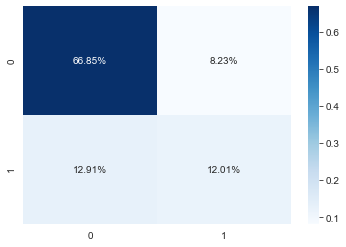

In [71]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### Support Vector Machines Classifier

* Good for imbalanced data like ours

In [72]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

svc_clf = SVC(random_state=100)
svc_clf.fit(X_train, y_train)

SVC(random_state=100)

In [73]:
y_predict = svc_clf.predict(X_test)

In [74]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      3587
         1.0       0.60      0.54      0.57      1191

    accuracy                           0.79      4778
   macro avg       0.72      0.71      0.72      4778
weighted avg       0.79      0.79      0.79      4778



In [76]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[3149  438]
 [ 547  644]]


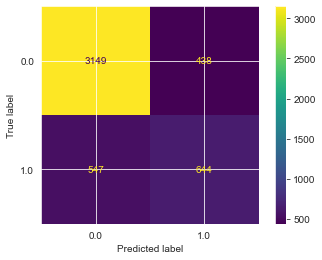

In [75]:
# See if visualizing the actuals will be interesting 

plot_confusion_matrix(svc_clf, X_test, y_test)  
plt.show()

<AxesSubplot:>

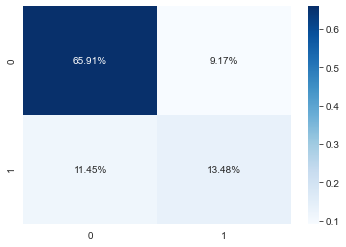

In [77]:
# Visualize in percentages 

sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [78]:
#Grid Search 

#pipe = Pipeline([('mms', MinMaxScaler()),
#                 ('tree', DecisionTreeClassifier(random_state=123))])

#grid = [{'tree__max_depth': [None, 2, 6, 10], 
#         'tree__min_samples_split': [5, 10]}]


#gridsearch = GridSearchCV(estimator=pipe, 
#                          param_grid=grid, 
#                          scoring='accuracy', 
#                          cv=5)

#gridsearch.fit(X_train, y_train)

gridsearch.score(X_test, y_test)

0.7867308497279196

# Evaluation and Conclusions

After evaluating several classification models (baseline logistic regression, decision tree, random forest, gradient boost, and support vector machines), we've chosen Gradient Boost as the model to determine whether candidates are likely to change careers. 

**Conclusions** 
- With our data being imbalanced, we evaluated our models based on the F1 Score because the F1 score captures a poor balance between recall and precision 
- The F1 score for our Gradient Boost model is 0.86
- Gradient Boost is a robust model that starts with a "weak learner" and continuously identifies examples that it got right or wrong. It then calculates the residuals to for each data point to determine how far off the predications were and combines these this with a loss function to calculate overall loss. 
- In other words, the model continuously improves itself!
- Our confusion matrix shows the model predicted 67% of the True Positives (predicted a candidate is looking for a new job, and they are actually looking for a new job) and 12% True Positives (predicted a candidate is not looking for a new job, and they are actually not looking for a new job). 

# Future Work 

**Future work:** 
* Refine existing models 
* Tune and prune hyperparameters 
* AUC Roc Curve 

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e+20, fit_intercept=False)


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for None: 0.7865984241536456
-------------------------------------------------------------------------------------


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e+20, class_weight='balanced', fit_intercept=False)


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for Balanced: 0.7865499704244993
-------------------------------------------------------------------------------------


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e+20, class_weight={0: 1, 1: 2}, fit_intercept=False)


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for 2 to 1: 0.7862849964081041
-------------------------------------------------------------------------------------


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e+20, class_weight={0: 1, 1: 10}, fit_intercept=False)


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for 10 to 1: 0.7826874825759689
-------------------------------------------------------------------------------------


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e+20, class_weight={0: 1, 1: 100}, fit_intercept=False)


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for 100 to 1: 0.7728956159206314
-------------------------------------------------------------------------------------


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e+20, class_weight={0: 1, 1: 1000}, fit_intercept=False)


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for 1000 to 1: 0.7644995443710929
-------------------------------------------------------------------------------------


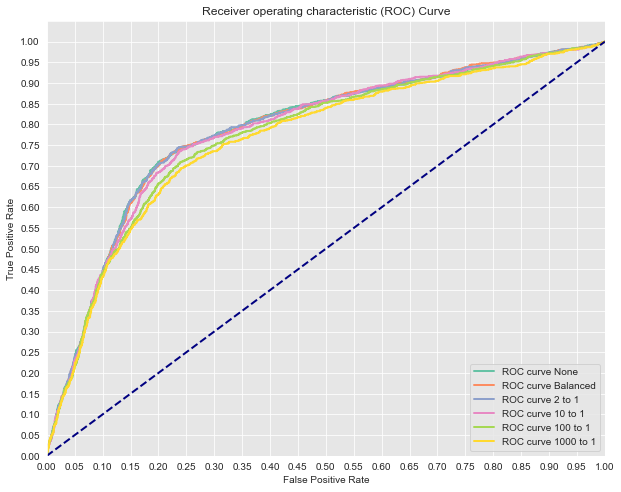

In [92]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Compare different regularization performances on the dataset:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train, y_train)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [79]:
# Convert gender, relevent_experience, enrolled_university,  using get_dummies() 
# x_feats = ['gender', 'relevent_experience', 'enrolled_university', 'education_level','major_discipline','experience','training_hours']
# X = pd.get_dummies(df[x_feats], drop_first=True, dtype=float)

# Convert target using get_dummies
# y = pd.get_dummies(df['target'], drop_first=True, dtype=float)
# y = y[1]

In [80]:
# Create intercept term required for sm.Logit
# X = sm.add_constant(X)

# Fit model
# logit_model = sm.Logit(y, X)

# Get results of the fit
# result = logit_model.fit()

In [81]:
# result.summary()

In [82]:
# np.exp(result.params)

In [83]:
# model_log.coef_

In [84]:
# Predict

# y_pred = logreg.predict(X)

In [85]:
# accuracy_score(y, y_pred)

In [86]:
#def plot_feature_importances(model):
#    n_features = X_train.shape[1]
#    plt.figure(figsize=(8,8))
#    plt.barh(range(n_features), model.feature_importances_, align='center') 
#    plt.yticks(np.arange(n_features), X_train.columns.values) 
#    plt.xlabel('Feature importance')
#    plt.ylabel('Feature')

#plot_feature_importances(classifier_tree)

In [87]:
# Impute 4508 Gender NaN entries to 'Not Stated' 
# use simple imputer

# df['gender'].fillna('Not Stated', inplace=True)
# df['gender'].value_counts()

In [88]:
# df = df.dropna(subset=['enrolled_university', 'education_level','experience','last_new_job'])

In [89]:
# df.info()

In [90]:
# df['major_discipline'].value_counts(dropna=False)

In [91]:
# Impute 2809 major_discipline NaN entries to 'Not Stated' 
# use simple imputer

# df['major_discipline'].fillna('Not Stated', inplace=True)
# df['major_discipline'].value_counts()